# 비트코인 추세 분석 및 시세 예측

### Jupyter 셋팅

In [2]:
import os
Join = os.path.join
VAR_DIR  = Join(os.getcwd(), "var")

import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(suppress=True)

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 8)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 80)

import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.family'] = 'NanumBarunGothic'
plt.rcParams['figure.figsize'] = (14,5)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True

### 바이낸스 셋팅

In [14]:
import win32api
import time
from datetime import datetime

from binance import Client
from binance.exceptions import BinanceAPIException

from env import KEY, SECRET

def getClient():
    try:
        return Client(KEY, SECRET, {"verify": True, "timeout": 20})
    except BinanceAPIException as e:
        print(e)
        return False


def closeClient(client):
    try:
        client.close_connection()
    except BinanceAPIException as e:
        print(e)
        return False


def server_time_sync(client):
    try:
        server_time= client.get_server_time()
    
        gmtime = time.gmtime(int((server_time["serverTime"])/1000))
        win32api.SetSystemTime(gmtime[0],
                                gmtime[1],
                                0,
                                gmtime[2],
                                gmtime[3],
                                gmtime[4],
                                gmtime[5],
                                0)

    except BinanceAPIException as e:
        print(e)
        return False


client = getClient()
assert client

server_time_sync(client)

### 매매 정보 가져오기

In [11]:
import csv

def convert_time(t, f='%Y-%m-%d %H:%M:%S'):
    t = t/1000
    return datetime.fromtimestamp(t).strftime(f)


fw = open(r'var\4h.csv', 'w', encoding='utf-8-sig', newline='')
candles = client.get_historical_klines_generator('BTCUSDT',
                                                Client.KLINE_INTERVAL_4HOUR,
                                                '1 Aug, 2017',
                                                '25 Mar, 2023')

for kline in candles:
    optime = kline[0]
    openPrice = kline[1]
    hightesPrice = kline[2]
    lowerPrice = kline[3]
    closePrice = kline[4]
    volume = kline[5]

    cw = csv.writer(fw, delimiter=',', lineterminator='\n')
    cw.writerow([convert_time(optime), openPrice, closePrice, hightesPrice, lowerPrice, volume])

fw.close()

closeClient(client)
print('Get End')

Get End


c:\python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


<AxesSubplot:xlabel='day'>

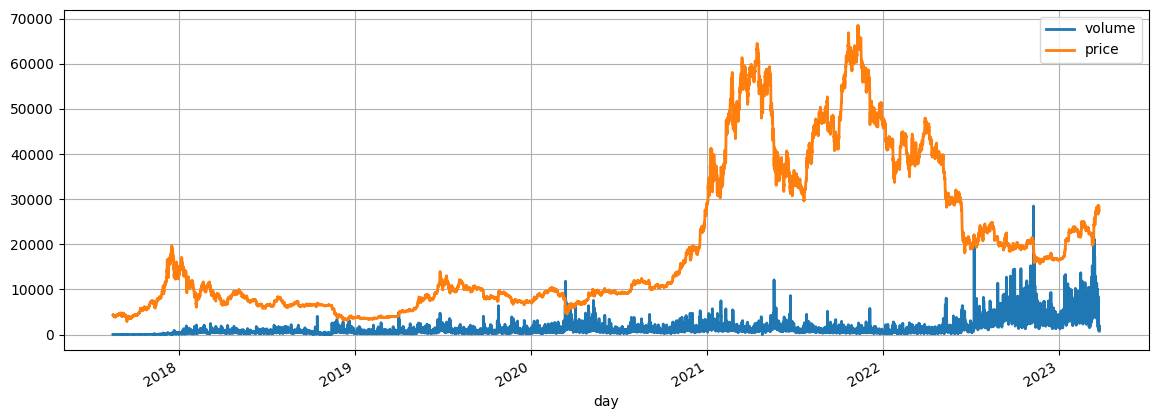

In [16]:
CSV_PATH = Join(VAR_DIR, '4h.csv')
bitcoin_df = pd.read_csv(CSV_PATH, sep=',', header=0, names=['day', 'price', 'hightesPrice', 'lowerPrice', 'closePrice', 'volume'])

df = bitcoin_df[['day', 'volume', 'price']]

df['volume'] = df['volume'] / 10                     # 사이즈가 크기 때문에 10으로 나눠준다.
df['day'] = pd.to_datetime(df['day'])

df.set_index('day', inplace=True)
log_df = log_df.replace([np.inf, -np.inf], np.nan)

df.plot()

##### 로그 시세

<AxesSubplot:xlabel='day'>

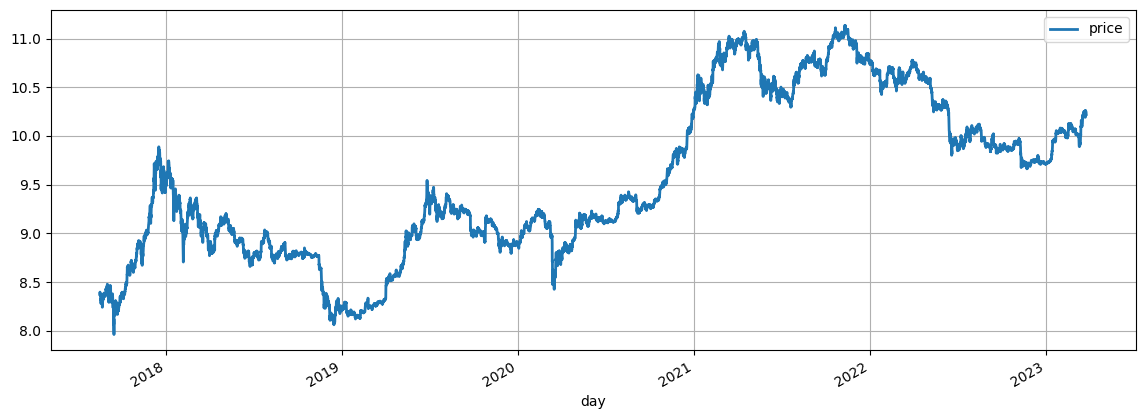

In [17]:
log_df = pd.DataFrame()
log_df['price'] = np.log(bitcoin_df['price'])
log_df['day'] = pd.to_datetime(bitcoin_df['day'])

log_df.set_index('day', inplace=True)
log_df = log_df.replace([np.inf, -np.inf], np.nan)

log_df.plot()